4.1. Реализовать методы Эйлера, Рунге-Кутты и Адамса 4-го порядка в виде программ, задавая в качестве входных данных шаг сетки h. С использованием разработанного программного обеспечения решить задачу Коши для ОДУ 2-го порядка на указанном отрезке. Оценить погрешность численного решения с использованием метода Рунге – Ромберга и путем сравнения с точным решением. 

Вариант 23

Задача Коши:

$$ x^2 y'' + xy' - y -3x^2 = 0 $$ 


$$ y(1) = 3,   y'(1) = 2 $$

$$x \in [1,2], h = 0.1$$



Точное решение: 

$$ y = x^2 + x + \frac{1}{x}$$

In [142]:
import matplotlib.pyplot as plt

In [118]:
def frange(start, stop, step):
    while start < stop:
        yield start
        start += step

Границы и начальные условия

In [119]:
a, b, h = 1, 2, 0.1

In [120]:
y, y1 = 3, 2

In [121]:
X = [x for x in frange(a, b+h, h)]

In [122]:
def f_accurate(x):
    return x**2 + x + 1/x

$$ y'' = 3 + \frac{y}{x^{2}} - \frac{y'}{x}

In [203]:
def f11(x, y, y1):  #  y' == f(x, y)
    return 3 + y/x**2 - y1/x

#### Явный метод Эйлера

In [124]:
def euler_vivid_y(x, y0, z0, f, h): # p == 1
    z = z0 + h * f(x, y0, z0)
    y = y0 + h * z
    return z, y

In [125]:
def error(y11, eps, h):  # eps E [X_k-1, X_k]
    return y11(eps) / 2 * h**2

#### Неявный метод Эйлера

In [126]:
def euler_vauge_y(x, y0, z0, f, h): # p == 1
    z = z0 + h * f(x, y0, z0)
    y = y0 + h*z
    return z, y

#### Методы Рунге-Кутты

#### Метод Рунге-Кутты четвертого порядка точности

In [200]:
def runge_knutta_4(x, y0, z0, f, h):
    K1 = h * z0
    L1 = h * f(x, y0, z0)
    K2 = h * (z0 + L1 / 2)
    L2 = h * f(x + h / 2, y0 + K1 / 2, z0 + L1 / 2)
    K3 = h * (z0 + L2/2) 
    L3 = h * f(x + h / 2, y0 +  K2 / 2, z0 + L2 / 2)
    K4 = h * (z0 + L3)
    L4 = h * f(x + h, y0 +  K3, z0 + L3)

    delta_y =  (K1 + 2* K2 + 2 * K3 + K4) / 6
    delta_z =  (L1 + 2* L2 + 2 * L3 + L4) / 6
    return z0 + delta_z, y0 + delta_y

#### Метод Рунге-Кутты Второго порядка точности

In [128]:
def runge_knutta_2(x, y0, z0, f, h):
    K1 = h * z0
    L1 = h * f(x, y0, z0)
    K2 = h * (z0 + L1 / 2)
    L2 = h * f(x + h / 2, y0 + K1 / 2, z0 + L1 / 2)

    delta_y =  (K1 +  K2) / 2
    delta_z =  (L1 + L2) / 2
    return z0 + delta_z, y0 + delta_y

### Универсальная функция

In [216]:
def func(a, b, z, y, step, f11, fun):
    y_a, z_a = [y], [z]
    for x in frange(a+h, b+h, step):
        print(x)
        z, y = fun(x, y, z, f11, step)
        z_a.append(z)
        y_a.append(y)
    return y_a, z_a

### Метод Адамса

Второго порядка

In [183]:
def Ad2(X, h, y0, z0, f11):
    z, y = func(a, a+h, y0, z0, h, f11, runge_knutta_4)

    for i in range(1, len(X) - 1):
        z.append(z[i] + h * (3 * f11(X[i], y[i], z[i]) - f11(X[i-1], y[i-1], z[i-1])) / 2)
        y.append(y[i] + h * (3 * z[i] - z[i-1]) / 2)

    return z, y


Четвертого порядка

In [165]:
def Ad4(X, h, y0, z0, f11):
    z, y = func(a, a+3*h , y0, z0, h, f11, runge_knutta_4)

    for i in range(3, len(X) - 1):
        z.append(z[i] + h * (55 * f11(X[i], y[i], z[i]) - 59 * f11(X[i-1], y[i-1], z[i-1]) + 37 * f11(X[i-2], y[i-2], z[i-2]) - 9 * f11(X[i-3], y[i-3], z[i-3])) / 24)
        y.append(y[i] + h * (55 * z[i] - 59 * z[i-1] + 37 * z[i-2] - 9 * z[i-3]) /24)

    return z, y

### Запуск

In [215]:
X

[1,
 1.1,
 1.2000000000000002,
 1.3000000000000003,
 1.4000000000000004,
 1.5000000000000004,
 1.6000000000000005,
 1.7000000000000006,
 1.8000000000000007,
 1.9000000000000008,
 2.000000000000001]

In [217]:
euler = func(a, b, y, y1, h, f11, euler_vivid_y)[1]
#euler_u = func(a, b, y, y1, h, f11, euler_vauge_y)[1]
rg2 = func(a, b, y, y1, h, f11, runge_knutta_2)[1]
rg4 = func(a, b, y, y1, h, f11, runge_knutta_4)[1]
ad2 = Ad2(X, h, y, y1, f11)[1]
ad4 = Ad2(X, h, y, y1, f11)[1]
y_valid = [f_accurate(x) for x in X]

1
1.1
1.2000000000000002
1.3000000000000003
1.4000000000000004
1.5000000000000004
1.6000000000000005
1.7000000000000006
1.8000000000000007
1.9000000000000008
2.000000000000001
1
1.1
1.2000000000000002
1.3000000000000003
1.4000000000000004
1.5000000000000004
1.6000000000000005
1.7000000000000006
1.8000000000000007
1.9000000000000008
2.000000000000001
1
1.1
1.2000000000000002
1.3000000000000003
1.4000000000000004
1.5000000000000004
1.6000000000000005
1.7000000000000006
1.8000000000000007
1.9000000000000008
2.000000000000001
1
1.1
1
1.1


ValueError: x and y must have same first dimension, but have shapes (11,) and (12,)

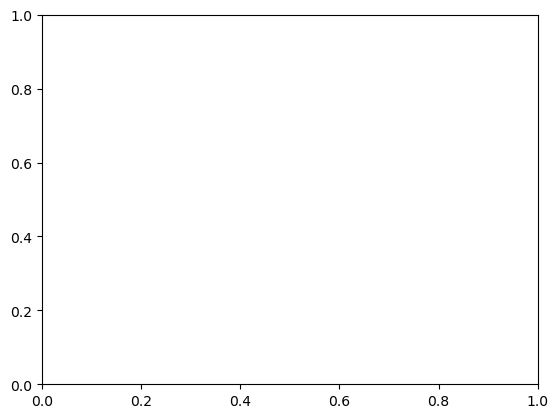

In [218]:
plt.plot(X, euler, label='Euler_vivid')
#plt.plot(X, euler_u, label='Euler_vogue')
plt.plot(X, rg2, label='Runge_Knutta_2')
plt.plot(X, rg4, label='Runge_Knutta_4')
plt.plot(X, ad2, label='Adams_2')
plt.plot(X, ad4, label='Adams_4')
plt.plot(X, y_valid, label='True_function')
#plt.axes('equal')
plt.legend()
plt.show()

In [207]:
y_valid

[3.0,
 3.2190909090909097,
 3.4733333333333336,
 3.7592307692307703,
 4.074285714285716,
 4.416666666666668,
 4.785000000000002,
 5.178235294117649,
 5.595555555555558,
 6.036315789473687,
 6.500000000000004]

In [210]:
euler

[3,
 3.2,
 3.400826446280992,
 3.6021522038567495,
 3.803779422791661,
 4.005584760311284,
 4.207489522216046,
 4.409442647216046,
 4.611410640295631,
 4.813371424609357,
 5.015310482781102]

In [212]:
rg4

[3,
 3.1999998438310127,
 3.399999759972814,
 3.599999717486223,
 3.799999699138807,
 3.999999695005592,
 4.19999969921748,
 4.3999997082331905,
 4.5999997198852824,
 4.799999732836137,
 4.999999746258966]